In [2]:
from pyspark.sql import SparkSession

# Inisialisasi SparkSession
spark = SparkSession.builder \
    .appName("Contoh Spark SQL") \
    .getOrCreate()

# Data
data = [
    ('James', 34, 'M', 3000, 1),
    ('Anna', 28, 'F', 4100, 2),
    ('Lee', 23, 'M', 2700, 1)
]

# Kolom
columns = ['Name', 'Age', 'Gender', 'Salary', 'DeptId']

# Membuat DataFrame
df = spark.createDataFrame(data, schema=columns)

# Membuat temporary view untuk SQL
df.createOrReplaceTempView('employees')

# Query 1: Menampilkan semua data
spark.sql('SELECT * FROM employees').show()

# Query 2: Memilih Name dan Age dengan Salary > 3000
spark.sql('SELECT Name, Age FROM employees WHERE Salary > 3000').show()

# Query 3: Menghitung rata-rata Salary
spark.sql('SELECT AVG(Salary) AS AvgSalary FROM employees').show()



+-----+---+------+------+------+
| Name|Age|Gender|Salary|DeptId|
+-----+---+------+------+------+
|James| 34|     M|  3000|     1|
| Anna| 28|     F|  4100|     2|
|  Lee| 23|     M|  2700|     1|
+-----+---+------+------+------+

+----+---+
|Name|Age|
+----+---+
|Anna| 28|
+----+---+

+------------------+
|         AvgSalary|
+------------------+
|3266.6666666666665|
+------------------+



In [1]:
from pyspark.sql import SparkSession

spark = SparkSession.builder \
    .appName("Tugas2SparkSQL") \
    .getOrCreate()

data = [
    ('James', 34, 'M', 3000, 1),
    ('Anna', 28, 'F', 4100, 2),
    ('Lee', 23, 'M', 2700, 1)
]
columns = ['Name', 'Age', 'Gender', 'Salary', 'DeptId']

df = spark.createDataFrame(data, schema=columns)
df.createOrReplaceTempView('employees')

print("Total Gaji berdasarkan Gender dan Usia")
spark.sql('''
SELECT Gender, Age, SUM(Salary) AS TotalSalary
FROM employees
GROUP BY Gender, Age
ORDER BY Age
''').show()

print("Rata-rata Gaji per Departemen")
spark.sql('''
SELECT DeptId, AVG(Salary) AS AvgSalary
FROM employees
GROUP BY DeptId
ORDER BY DeptId
''').show()

print("Karyawan dengan Gaji di Atas Rata-rata Gender")
spark.sql('''
SELECT e.Name, e.Gender, e.Salary
FROM employees e
JOIN (
    SELECT Gender, AVG(Salary) AS AvgSalary
    FROM employees
    GROUP BY Gender
) g_avg
ON e.Gender = g_avg.Gender
WHERE e.Salary > g_avg.AvgSalary
''').show()

print("Ranking Gaji per Departemen")
spark.sql('''
SELECT 
    Name,
    DeptId,
    Salary,
    RANK() OVER (PARTITION BY DeptId ORDER BY Salary DESC) AS RankInDept
FROM employees
ORDER BY DeptId, RankInDept
''').show()

spark.stop()


Using Spark's default log4j profile: org/apache/spark/log4j2-defaults.properties
25/11/06 13:59:25 WARN Utils: Your hostname, pekar-VirtualBox, resolves to a loopback address: 127.0.1.1; using 10.0.2.15 instead (on interface enp0s3)
25/11/06 13:59:25 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
Using Spark's default log4j profile: org/apache/spark/log4j2-defaults.properties
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
25/11/06 13:59:33 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


Total Gaji berdasarkan Gender dan Usia


+------+---+-----------+
|Gender|Age|TotalSalary|
+------+---+-----------+
|     M| 23|       2700|
|     F| 28|       4100|
|     M| 34|       3000|
+------+---+-----------+

Rata-rata Gaji per Departemen


+------+---------+
|DeptId|AvgSalary|
+------+---------+
|     1|   2850.0|
|     2|   4100.0|
+------+---------+

Karyawan dengan Gaji di Atas Rata-rata Gender


+-----+------+------+
| Name|Gender|Salary|
+-----+------+------+
|James|     M|  3000|
+-----+------+------+

Ranking Gaji per Departemen
+-----+------+------+----------+
| Name|DeptId|Salary|RankInDept|
+-----+------+------+----------+
|James|     1|  3000|         1|
|  Lee|     1|  2700|         2|
| Anna|     2|  4100|         1|
+-----+------+------+----------+



In [5]:
from pyspark.sql import SparkSession

# Buat SparkSession
spark = SparkSession.builder \
    .appName("Tugas3WindowFunctions") \
    .getOrCreate()

# Contoh data
data = [
    ('James', 34, 'M', 3000, 1),
    ('Anna', 28, 'F', 4100, 2),
    ('Lee', 23, 'M', 2700, 1),
    ('John', 34, 'M', 3200, 1),
    ('Maria', 28, 'F', 4300, 2),
    ('Rina', 28, 'F', 3900, 2),
    ('David', 23, 'M', 2600, 1)
]
columns = ['Name', 'Age', 'Gender', 'Salary', 'DeptId']

# Membuat DataFrame dan register sebagai temporary view
df = spark.createDataFrame(data, schema=columns)
df.createOrReplaceTempView('employees')

# Menampilkan ranking gaji berdasarkan kelompok usia
print("Ranking Gaji berdasarkan Kelompok Usia")
spark.sql('''
SELECT 
    Name,
    Age,
    Salary,
    ROW_NUMBER() OVER (PARTITION BY Age ORDER BY Salary DESC) AS RankInAgeGroup
FROM employees
ORDER BY Age, RankInAgeGroup
''').show()

# Menampilkan hanya Top 3 karyawan per kelompok usia
print("Top 3 Karyawan per Kelompok Usia")
spark.sql('''
SELECT *
FROM (
    SELECT 
        Name,
        Age,
        Salary,
        ROW_NUMBER() OVER (PARTITION BY Age ORDER BY Salary DESC) AS RankInAgeGroup
    FROM employees
)
WHERE RankInAgeGroup <= 3
ORDER BY Age, RankInAgeGroup
''').show()

# Tutup Spark session
spark.stop()


Ranking Gaji berdasarkan Kelompok Usia


+-----+---+------+--------------+
| Name|Age|Salary|RankInAgeGroup|
+-----+---+------+--------------+
|  Lee| 23|  2700|             1|
|David| 23|  2600|             2|
|Maria| 28|  4300|             1|
| Anna| 28|  4100|             2|
| Rina| 28|  3900|             3|
| John| 34|  3200|             1|
|James| 34|  3000|             2|
+-----+---+------+--------------+

Top 3 Karyawan per Kelompok Usia


+-----+---+------+--------------+
| Name|Age|Salary|RankInAgeGroup|
+-----+---+------+--------------+
|  Lee| 23|  2700|             1|
|David| 23|  2600|             2|
|Maria| 28|  4300|             1|
| Anna| 28|  4100|             2|
| Rina| 28|  3900|             3|
| John| 34|  3200|             1|
|James| 34|  3000|             2|
+-----+---+------+--------------+



In [8]:
from pyspark.sql import SparkSession

# Buat SparkSession
spark = SparkSession.builder.appName('Pertemuan9').getOrCreate()

employees = spark.createDataFrame([
    ('James', 34, 'M', 3000, 1),
    ('Anna', 28, 'F', 4100, 2),
    ('Lee', 23, 'M', 2700, 1),
    ('John', 40, 'M', 3500, 2),
    ('Maria', 31, 'F', 4200, 2),
    ('Rina', 29, 'F', 4000, 1)
], ['Name', 'Age', 'Gender', 'Salary', 'DeptId'])

departments = spark.createDataFrame([
    (1, 'HR'),
    (2, 'Marketing')
], ['DeptId', 'DeptName'])

projects = spark.createDataFrame([
    (1, 'Project A'),
    (1, 'Project C'),
    (2, 'Project B')
], ['DeptId', 'ProjectName'])

employees.createOrReplaceTempView('employees')
departments.createOrReplaceTempView('departments')
projects.createOrReplaceTempView('projects')

print("Multi Joins (Employees + Departments + Projects)")
spark.sql('''
SELECT e.Name, e.Age, e.Gender, e.Salary, 
       d.DeptName, p.ProjectName
FROM employees e
JOIN departments d ON e.DeptId = d.DeptId
JOIN projects p ON e.DeptId = p.DeptId
ORDER BY e.DeptId, e.Name
''').show()

print("Karyawan dengan gaji di atas rata-rata departemen")
spark.sql('''
SELECT e.Name, e.Gender, e.Salary, d.DeptName
FROM employees e
JOIN departments d ON e.DeptId = d.DeptId
WHERE e.Salary > (
    SELECT AVG(Salary)
    FROM employees
    WHERE DeptId = e.DeptId
)
ORDER BY d.DeptName, e.Salary DESC
''').show()

print("Ranking Gaji per Departemen")
spark.sql('''
SELECT 
    e.Name,
    d.DeptName,
    e.Salary,
    RANK() OVER (PARTITION BY e.DeptId ORDER BY e.Salary DESC) AS RankInDept
FROM employees e
JOIN departments d ON e.DeptId = d.DeptId
ORDER BY e.DeptId, RankInDept
''').show()

print("Analisis Mendalam: Gaji, Proyek, dan Ranking")
spark.sql('''
SELECT 
    e.Name,
    e.Gender,
    d.DeptName,
    p.ProjectName,
    e.Salary,
    ROUND(AVG(e.Salary) OVER (PARTITION BY e.DeptId), 2) AS AvgDeptSalary,
    RANK() OVER (PARTITION BY e.DeptId ORDER BY e.Salary DESC) AS RankInDept
FROM employees e
JOIN departments d ON e.DeptId = d.DeptId
JOIN projects p ON e.DeptId = p.DeptId
WHERE e.Salary > (
    SELECT AVG(Salary) 
    FROM employees 
    WHERE DeptId = e.DeptId
)
ORDER BY e.DeptId, RankInDept
''').show()

spark.stop()


Multi Joins (Employees + Departments + Projects)


+-----+---+------+------+---------+-----------+
| Name|Age|Gender|Salary| DeptName|ProjectName|
+-----+---+------+------+---------+-----------+
|James| 34|     M|  3000|       HR|  Project A|
|James| 34|     M|  3000|       HR|  Project C|
|  Lee| 23|     M|  2700|       HR|  Project A|
|  Lee| 23|     M|  2700|       HR|  Project C|
| Rina| 29|     F|  4000|       HR|  Project A|
| Rina| 29|     F|  4000|       HR|  Project C|
| Anna| 28|     F|  4100|Marketing|  Project B|
| John| 40|     M|  3500|Marketing|  Project B|
|Maria| 31|     F|  4200|Marketing|  Project B|
+-----+---+------+------+---------+-----------+

Karyawan dengan gaji di atas rata-rata departemen


+-----+------+------+---------+
| Name|Gender|Salary| DeptName|
+-----+------+------+---------+
| Rina|     F|  4000|       HR|
|Maria|     F|  4200|Marketing|
| Anna|     F|  4100|Marketing|
+-----+------+------+---------+

Ranking Gaji per Departemen


+-----+---------+------+----------+
| Name| DeptName|Salary|RankInDept|
+-----+---------+------+----------+
| Rina|       HR|  4000|         1|
|James|       HR|  3000|         2|
|  Lee|       HR|  2700|         3|
|Maria|Marketing|  4200|         1|
| Anna|Marketing|  4100|         2|
| John|Marketing|  3500|         3|
+-----+---------+------+----------+

Analisis Mendalam: Gaji, Proyek, dan Ranking


+-----+------+---------+-----------+------+-------------+----------+
| Name|Gender| DeptName|ProjectName|Salary|AvgDeptSalary|RankInDept|
+-----+------+---------+-----------+------+-------------+----------+
| Rina|     F|       HR|  Project A|  4000|       4000.0|         1|
| Rina|     F|       HR|  Project C|  4000|       4000.0|         1|
|Maria|     F|Marketing|  Project B|  4200|       4150.0|         1|
| Anna|     F|Marketing|  Project B|  4100|       4150.0|         2|
+-----+------+---------+-----------+------+-------------+----------+



In [9]:
from pyspark.sql import SparkSession

# Membuat Spark session
spark = SparkSession.builder.appName("Tugas5_6_SparkSQL").getOrCreate()

employees = spark.createDataFrame([
    ('James', 34, 'M', 3000, 1),
    ('Anna', 28, 'F', 4100, 2),
    ('Lee', 23, 'M', 2700, 1),
    ('John', 40, 'M', 3500, 2),
    ('Maria', 31, 'F', 4200, 2),
    ('Rina', 29, 'F', 4000, 1),
    ('David', 23, 'M', 2600, 1),
    ('Sara', 30, 'F', 3900, 2)
], ['Name', 'Age', 'Gender', 'Salary', 'DeptId'])

departments = spark.createDataFrame([
    (1, 'HR'),
    (2, 'Marketing')
], ['DeptId', 'DeptName'])

# Register sebagai temporary view untuk query SQL
employees.createOrReplaceTempView('employees')
departments.createOrReplaceTempView('departments')

print("Rata-rata Gaji & Ranking per Departemen")
spark.sql('''
SELECT 
    e.Name,
    d.DeptName,
    e.Salary,
    ROUND(AVG(e.Salary) OVER (PARTITION BY e.DeptId), 2) AS AvgDeptSalary,
    RANK() OVER (PARTITION BY e.DeptId ORDER BY e.Salary DESC) AS RankInDept
FROM employees e
JOIN departments d ON e.DeptId = d.DeptId
ORDER BY d.DeptName, RankInDept
''').show()


Rata-rata Gaji & Ranking per Departemen


[Stage 1:>                                                          (0 + 2) / 2]

+-----+---------+------+-------------+----------+
| Name| DeptName|Salary|AvgDeptSalary|RankInDept|
+-----+---------+------+-------------+----------+
| Rina|       HR|  4000|       3075.0|         1|
|James|       HR|  3000|       3075.0|         2|
|  Lee|       HR|  2700|       3075.0|         3|
|David|       HR|  2600|       3075.0|         4|
|Maria|Marketing|  4200|       3925.0|         1|
| Anna|Marketing|  4100|       3925.0|         2|
| Sara|Marketing|  3900|       3925.0|         3|
| John|Marketing|  3500|       3925.0|         4|
+-----+---------+------+-------------+----------+



In [10]:
print("Tren Gaji Berdasarkan Usia di Setiap Departemen")
spark.sql('''
SELECT 
    e.Name,
    d.DeptName,
    e.Age,
    e.Salary,
    LAG(e.Salary, 1) OVER (PARTITION BY e.DeptId ORDER BY e.Age) AS PrevSalary,
    LEAD(e.Salary, 1) OVER (PARTITION BY e.DeptId ORDER BY e.Age) AS NextSalary,
    ROUND(AVG(e.Salary) OVER (PARTITION BY e.DeptId ORDER BY e.Age ROWS BETWEEN 1 PRECEDING AND 1 FOLLOWING), 2) AS MovingAvgSalary
FROM employees e
JOIN departments d ON e.DeptId = d.DeptId
ORDER BY d.DeptName, e.Age
''').show()

spark.stop()

Tren Gaji Berdasarkan Usia di Setiap Departemen


+-----+---------+---+------+----------+----------+---------------+
| Name| DeptName|Age|Salary|PrevSalary|NextSalary|MovingAvgSalary|
+-----+---------+---+------+----------+----------+---------------+
|  Lee|       HR| 23|  2700|      NULL|      2600|         2650.0|
|David|       HR| 23|  2600|      2700|      4000|         3100.0|
| Rina|       HR| 29|  4000|      2600|      3000|         3200.0|
|James|       HR| 34|  3000|      4000|      NULL|         3500.0|
| Anna|Marketing| 28|  4100|      NULL|      3900|         4000.0|
| Sara|Marketing| 30|  3900|      4100|      4200|        4066.67|
|Maria|Marketing| 31|  4200|      3900|      3500|        3866.67|
| John|Marketing| 40|  3500|      4200|      NULL|         3850.0|
+-----+---------+---+------+----------+----------+---------------+



In [12]:
pip install matplotlib pandas


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 9.1 MB/s  0:00:00m 9.6 MB/s eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 9.1 MB/s  0:00:01 eta 0:00:01:01:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 10.1 MB/s  0:00:001.2 MB/s eta 0:00:01:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 3.1 MB/s  0:00:00m 8.2 MB/s eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.6/16.6 MB 9.0 MB/s  0:00:01m 9.6 MB/s eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 6.4 MB/s  0:00:01m 7.7 MB/s eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11/11 [matplotlib]0m 10/11 [matplotlib]tools]
Note: you may need to restart the kernel to use updated packages.


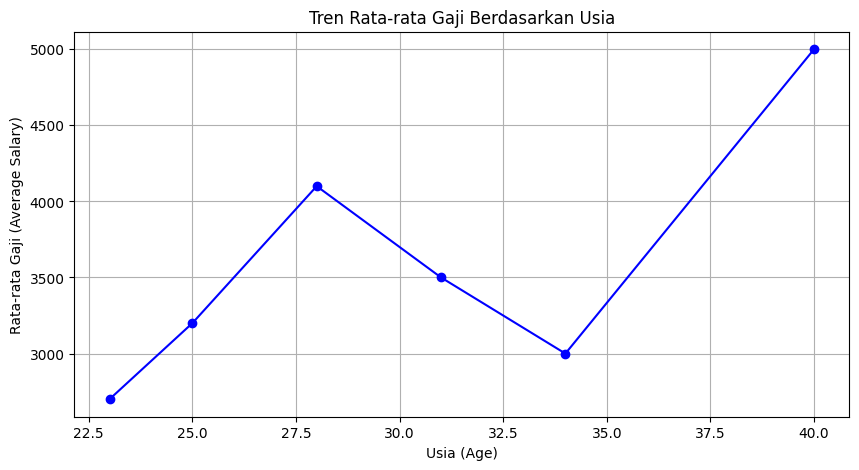

In [13]:
# Import library
from pyspark.sql import SparkSession
import matplotlib.pyplot as plt
import pandas as pd

# Inisialisasi SparkSession
spark = SparkSession.builder.appName('AnalisisTrenGaji').getOrCreate()

# Buat DataFrame contoh
data = [
    ('James', 34, 'M', 3000, 1),
    ('Anna', 28, 'F', 4100, 2),
    ('Lee', 23, 'M', 2700, 1),
    ('Maria', 31, 'F', 3500, 2),
    ('John', 40, 'M', 5000, 1),
    ('Sophie', 25, 'F', 3200, 2)
]
columns = ['Name', 'Age', 'Gender', 'Salary', 'DeptId']

employees = spark.createDataFrame(data, schema=columns)
employees.createOrReplaceTempView('employees')

# --- Analisis Tren Gaji dengan Spark SQL ---
salary_trends = spark.sql('''
SELECT Age, AVG(Salary) AS AverageSalary
FROM employees
GROUP BY Age
ORDER BY Age
''').toPandas()

# --- Visualisasi Hasil Analisis ---
plt.figure(figsize=(10, 5))
plt.plot(salary_trends['Age'], salary_trends['AverageSalary'], marker='o', color='blue')
plt.xlabel('Usia (Age)')
plt.ylabel('Rata-rata Gaji (Average Salary)')
plt.title('Tren Rata-rata Gaji Berdasarkan Usia')
plt.grid(True)
plt.show()


Using Spark's default log4j profile: org/apache/spark/log4j2-defaults.properties
25/11/03 19:08:46 WARN Utils: Your hostname, pekar-VirtualBox, resolves to a loopback address: 127.0.1.1; using 10.0.2.15 instead (on interface enp0s3)
25/11/03 19:08:46 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
Using Spark's default log4j profile: org/apache/spark/log4j2-defaults.properties
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
25/11/03 19:08:49 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
                                                                                

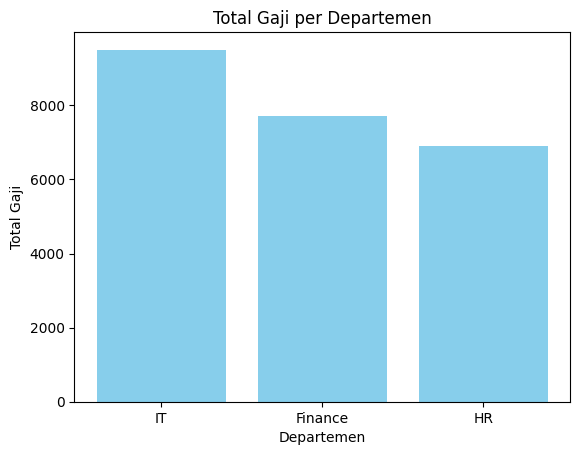

In [1]:
from pyspark.sql import SparkSession
import pandas as pd
import matplotlib.pyplot as plt

# Inisialisasi Spark
spark = SparkSession.builder.appName("AnalisisGajiDepartemen").getOrCreate()

# Data contoh
data = [
    ('James', 'IT', 3000),
    ('Anna', 'HR', 4100),
    ('Lee', 'IT', 2700),
    ('Siti', 'Finance', 3500),
    ('Andi', 'HR', 2800),
    ('Rina', 'Finance', 4200),
    ('Tono', 'IT', 3800)
]
columns = ['Name', 'Dept', 'Salary']

# Buat DataFrame
df = spark.createDataFrame(data, columns)
df.createOrReplaceTempView('employees')

# Query SQL
result = spark.sql("""
SELECT Dept, SUM(Salary) AS Total_Gaji, COUNT(Name) AS Jumlah_Karyawan
FROM employees
GROUP BY Dept
ORDER BY Total_Gaji DESC
""")

# Konversi ke Pandas untuk visualisasi
pdf = result.toPandas()

# Visualisasi
plt.bar(pdf['Dept'], pdf['Total_Gaji'], color='skyblue')
plt.title('Total Gaji per Departemen')
plt.xlabel('Departemen')
plt.ylabel('Total Gaji')
plt.show()


+--------+------------------+
|AgeGroup|         AvgSalary|
+--------+------------------+
|   30-39|3566.6666666666665|
|   20-29|            3375.0|
+--------+------------------+



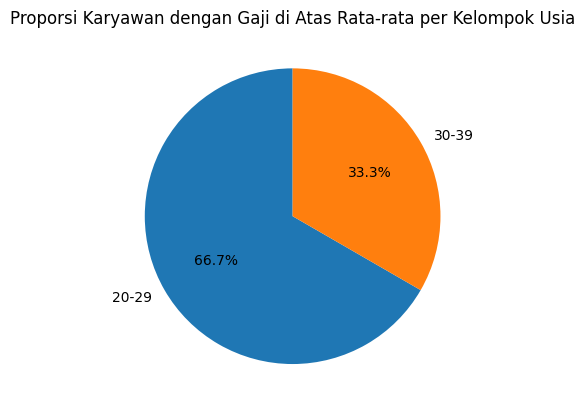

In [3]:
from pyspark.sql.functions import when, avg

data = [
    ('James', 34, 3000),
    ('Anna', 28, 4100),
    ('Lee', 23, 2700),
    ('Siti', 31, 3500),
    ('Andi', 26, 2900),
    ('Rina', 38, 4200),
    ('Tono', 24, 3800)
]
columns = ['Name', 'Age', 'Salary']

df = spark.createDataFrame(data, columns)

# Tambahkan kelompok usia
df = df.withColumn(
    "AgeGroup",
    when(df.Age < 30, "20-29")
    .when((df.Age >= 30) & (df.Age < 40), "30-39")
)

df.createOrReplaceTempView('employees_age')

# Query: rata-rata gaji per kelompok usia
spark.sql("""
SELECT AgeGroup, AVG(Salary) AS AvgSalary
FROM employees_age
GROUP BY AgeGroup
""").show()

# Query: karyawan dengan gaji di atas rata-rata kelompoknya
result = spark.sql("""
SELECT e.Name, e.AgeGroup, e.Salary
FROM employees_age e
JOIN (
    SELECT AgeGroup, AVG(Salary) AS AvgSalary
    FROM employees_age
    GROUP BY AgeGroup
) avg_tbl
ON e.AgeGroup = avg_tbl.AgeGroup
WHERE e.Salary > avg_tbl.AvgSalary
""")

pdf = result.toPandas()

# Visualisasi (Pie Chart per kelompok usia)
age_groups = pdf.groupby("AgeGroup").size()
age_groups.plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Proporsi Karyawan dengan Gaji di Atas Rata-rata per Kelompok Usia')
plt.ylabel('')
plt.show()


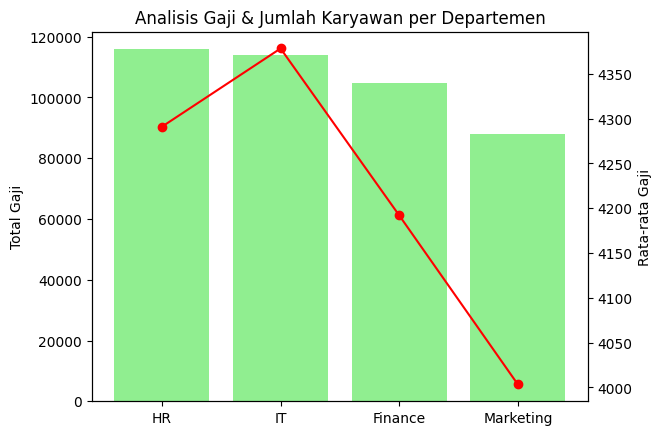

In [2]:
import random

# Dataset Departemen
departments = [
    (1, 'IT'),
    (2, 'HR'),
    (3, 'Finance'),
    (4, 'Marketing')
]
dept_df = spark.createDataFrame(departments, ['DeptId', 'DeptName'])
dept_df.createOrReplaceTempView('departments')

# Dataset Karyawan (100 baris acak)
names = ['James','Anna','Lee','Siti','Andi','Rina','Tono','Budi','Dewi','Eka']
data = [(random.choice(names)+str(i),
         random.randint(20,50),
         random.choice(['M','F']),
         random.randint(2500,6000),
         random.randint(1,4)) for i in range(100)]
columns = ['Name','Age','Gender','Salary','DeptId']
emp_df = spark.createDataFrame(data, columns)
emp_df.createOrReplaceTempView('employees')

# Analisis SQL
query = """
SELECT d.DeptName,
       COUNT(e.Name) AS Jumlah_Karyawan,
       ROUND(AVG(e.Salary),2) AS Rata_Gaji,
       SUM(e.Salary) AS Total_Gaji
FROM employees e
JOIN departments d ON e.DeptId = d.DeptId
GROUP BY d.DeptName
ORDER BY Total_Gaji DESC
"""
result = spark.sql(query)
pdf = result.toPandas()

# Visualisasi gabungan
fig, ax1 = plt.subplots()

ax1.bar(pdf['DeptName'], pdf['Total_Gaji'], color='lightgreen', label='Total Gaji')
ax1.set_ylabel('Total Gaji')

ax2 = ax1.twinx()
ax2.plot(pdf['DeptName'], pdf['Rata_Gaji'], color='red', marker='o', label='Rata-rata Gaji')
ax2.set_ylabel('Rata-rata Gaji')

plt.title('Analisis Gaji & Jumlah Karyawan per Departemen')
plt.show()
